In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb

import matplotlib.pyplot as plt

In [2]:
path_symbols = "outputs/models/trial_0_fold_0_20250107_130426.txt"

In [3]:
model = lgb.Booster(model_file=path_symbols)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

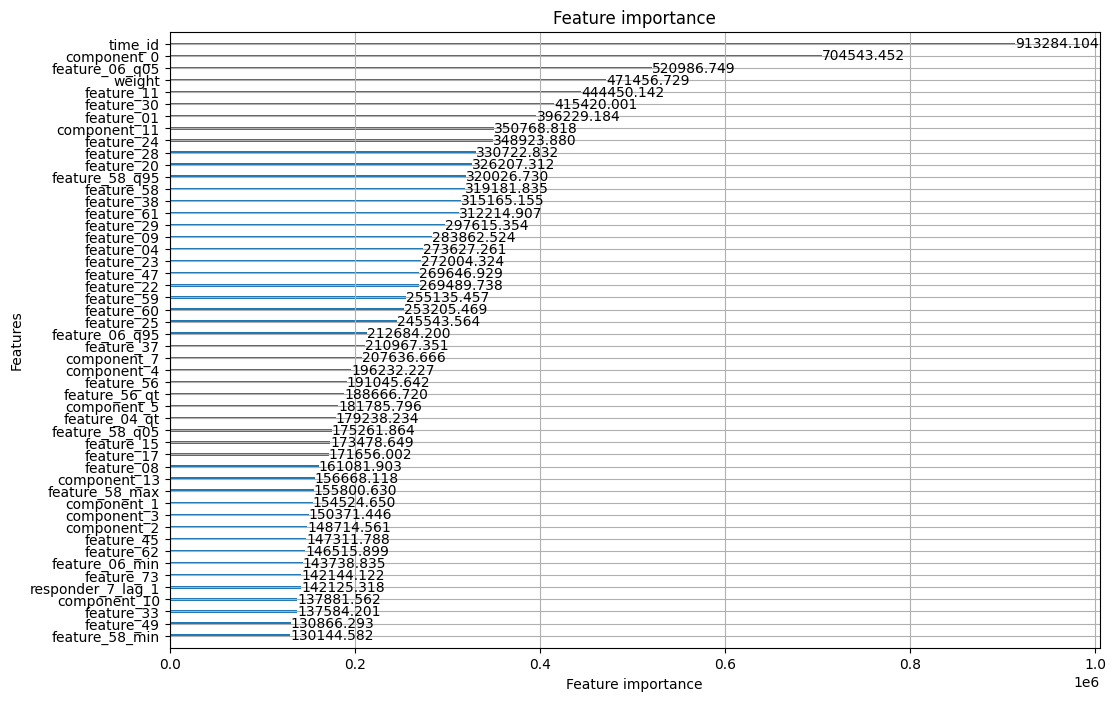

In [4]:
lgb.plot_importance(
    model,
    max_num_features=50,
    figsize=(12, 8),
    importance_type="gain"
)

<Axes: title={'center': 'Split value histogram for feature with name time_id'}, xlabel='Feature split value', ylabel='Count'>

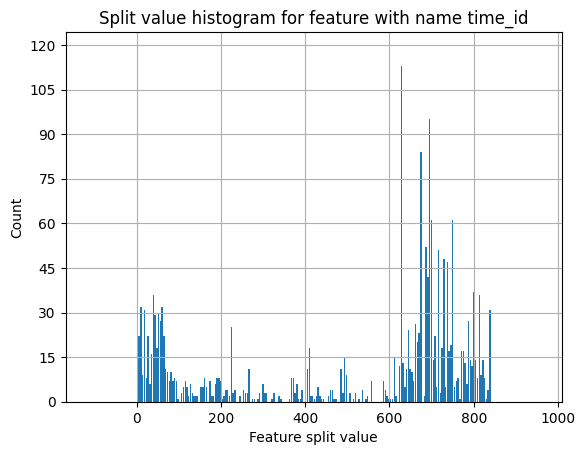

In [5]:
lgb.plot_split_value_histogram(
    model,
    feature="time_id"
)

<Axes: title={'center': 'Split value histogram for feature with name component_0'}, xlabel='Feature split value', ylabel='Count'>

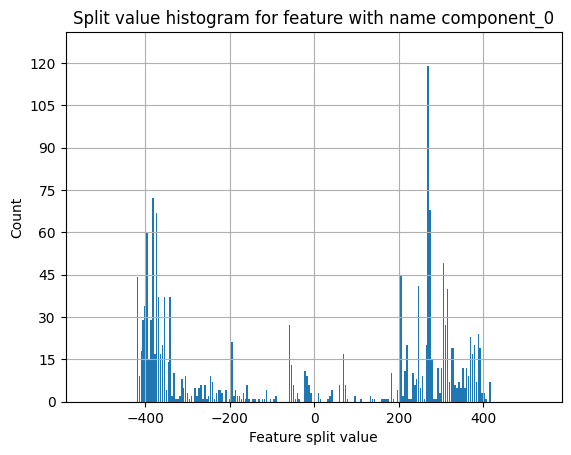

In [6]:
lgb.plot_split_value_histogram(
    model,
    feature="component_0"
)

In [7]:
trees = model.trees_to_dataframe()

<Axes: >

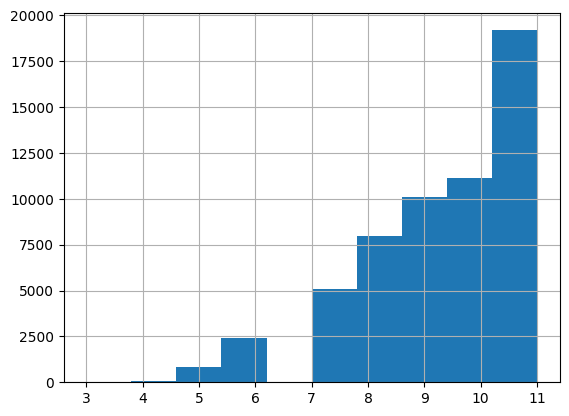

In [8]:
(trees
 .loc[trees.split_gain.isna()]
 .node_depth
 .hist()
)

(0.0, 100.0)

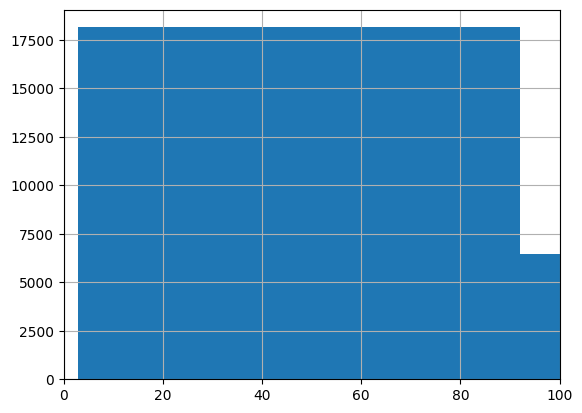

In [13]:
# can increase min_data_in leaf?

(trees
 .loc[trees.split_gain.isna()]
 ["count"]
 .hist(bins=10000)
)

plt.xlim([0, 100])

In [14]:
(trees
 .loc[trees.split_gain.isna()]
 ["count"]
 .describe()
)

count     56834.000000
mean      19343.140127
std       60303.895650
min           3.000000
25%          62.000000
50%         287.000000
75%        3737.000000
max      889630.000000
Name: count, dtype: float64

### new model (seems already better)

In [15]:
path = "/Users/alessandro.gussoni/Documents/jane_street/outputs/models/trial_0_fold_0_20250107_135357.txt"
model = lgb.Booster(model_file=path)
trees = model.trees_to_dataframe()

(0.0, 1000.0)

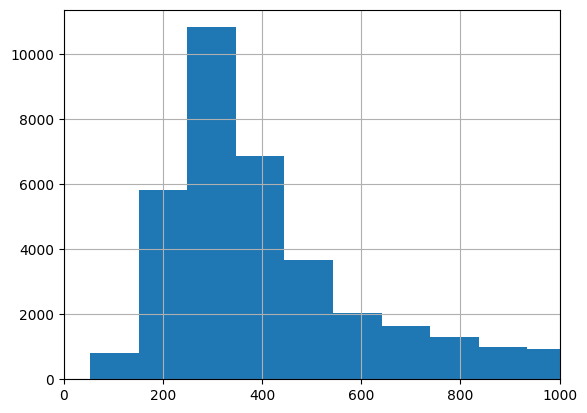

In [17]:
(trees
 .loc[trees.split_gain.isna()]
 ["count"]
 .hist(bins=10000)
)

plt.xlim([0, 1000])

<Axes: >

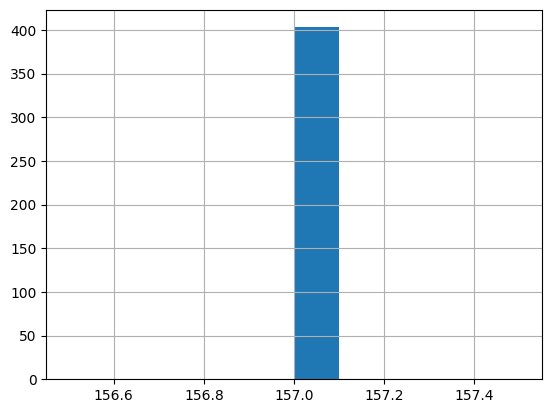

In [21]:
# not sure if i need to specify this since it is a hard costraint

(trees
 .loc[trees.split_gain.isna()]
 .groupby("tree_index")
 .size()
 .hist()
)

<Axes: xlabel='tree_index'>

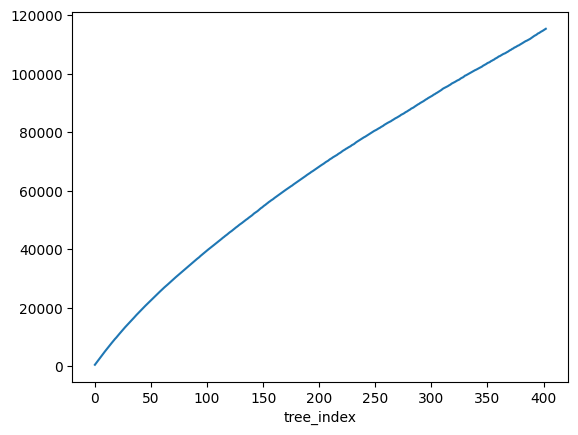

In [25]:
(trees
 .groupby("tree_index")
 .split_gain
 .mean()
 .cumsum()
 .plot()
)

In [27]:
trees.head()

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S2,0-S1,None,feature_06_q05,7580.020020,-0.123814,<=,left,None,0.000000,0.00,3036873
1,0,2,0-S2,0-S24,0-S10,0-S0,feature_56,1650.339966,-0.712869,<=,left,NaN,0.000183,2336270.00,1358204
2,0,3,0-S24,0-S45,0-S41,0-S2,feature_49,759.043030,-3.537444,<=,left,None,0.000425,643569.00,361251
3,0,4,0-S45,0-S112,0-S70,0-S24,feature_11,424.592010,59||150||261||376||410,==,right,NaN,-0.001350,7502.77,4906
4,0,5,0-S112,0-S113,0-L113,0-S45,feature_61,233.710007,0.922622,<=,left,None,-0.003753,1760.07,1546
